## Introduction

How does the impact of diverse national emissions on global temperature trends over time?

The purpose of this analysis report is to establish and analyze the link between diverse national emissions to global temperatue change over the course of 30 years.

This analysis tried to resolve the following questions:
1. Out of the all the emmissions produced, which emission had the greatest impact.
2. Which country/countries contribute to major temperature change.
3. Is there a direct co-dependency of temperature with emissions.

## Loading the datasets

### Dataset 1: Emissions by Country Dataset

This dataset provides an in-depth look into the global CO2 emissions at the country-level,
allowing for a better understanding of how much each country contributes to the global
cumulative human impact on climate.

### Dataset 2: All Countries Temperature Statistics 1970-2021.

This dataset provides information on changes in global surface temperature across all
countries from 1970 to 2021. It includes data on temperature variations over a 51-year
period and is based on information from various sources, including weather stations, satel-
lites, and ocean buoys.

In [93]:
# Load data from database
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd

warnings.filterwarnings("ignore")

def load_data(db_path, query):
    conn = sq.connect(db_path)
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

emission_data=load_data('../data/emission_data.sqlite','SELECT * FROM emission_data')
temperature_data=load_data('../data/temperature_data.sqlite','SELECT * FROM temperature_data')

### Dataset 1 : All Countries Temperature Statistics 1970-2021

In [114]:


print("Temperature data:")
display(temperature_data.head())



Temperature data:


,ObjectId,Country Name,Change,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,"Afghanistan, Islamic Rep. of",Surface Temperature Change,0.898,0.652,-1.089,0.262,-0.470,-0.468,-0.295,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,2,Albania,Surface Temperature Change,-0.119,-0.200,-0.077,-0.299,-0.134,-0.203,-0.672,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,3,Algeria,Surface Temperature Change,0.114,-0.380,-0.342,-0.028,-0.502,-0.554,-0.817,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,5,"Andorra, Principality of",Surface Temperature Change,0.081,-0.355,-0.526,-0.010,-0.412,0.207,-0.081,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
4,6,Angola,Surface Temperature Change,0.249,-0.092,-0.029,0.477,-0.152,-0.018,-0.309,...,0.576,1.090,0.879,1.430,1.847,1.064,1.504,1.975,1.387,1.631


#### Observing mean temperature change over the years

The following bar graph indicates the temperature change increasing and decreasing over the years but overal average from 1990 to 2020 increased constantly.

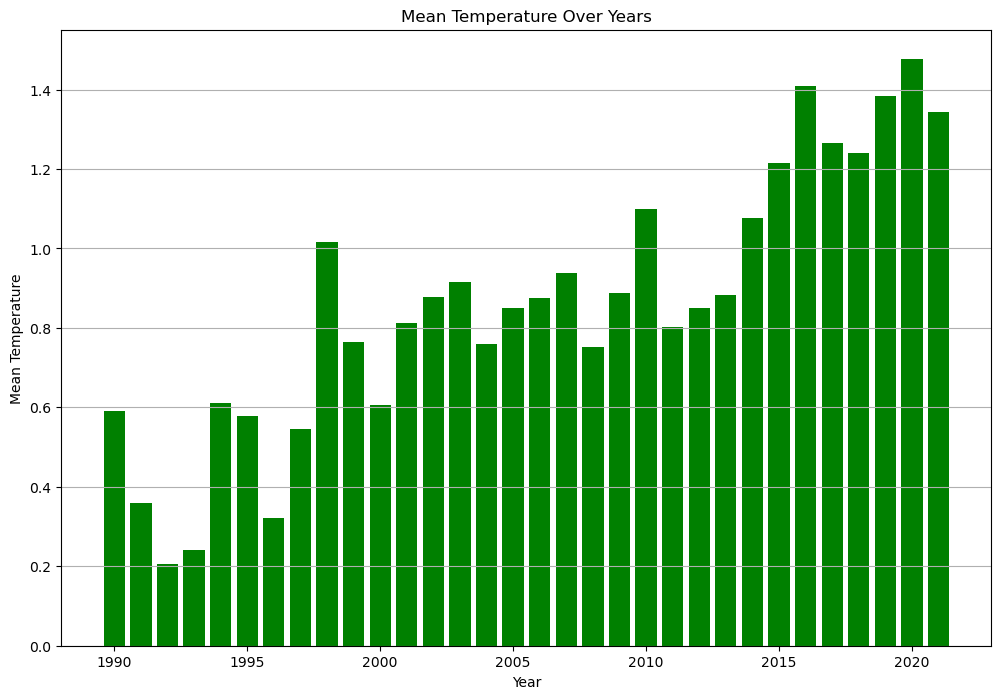

In [72]:
# Reshape the DataFrame from wide to long format
temperature_long = temperature_data.melt(id_vars=['ObjectId', 'Country Name', 'Change '], 
                                         var_name='Year', 
                                         value_name='Temperature')

# Convert the 'Year' column to numeric
temperature_long['Year'] = pd.to_numeric(temperature_long['Year'])

# Filter the data to include only years from 1990 onwards
temperature_long = temperature_long[temperature_long['Year'] >= 1990]

# Calculate the mean temperature for each year
mean_temperature_by_year = temperature_long.groupby('Year')['Temperature'].mean().reset_index()

# Plotting the bar graph of the mean temperature for each year
plt.figure(figsize=(12, 8))
plt.bar(mean_temperature_by_year['Year'], mean_temperature_by_year['Temperature'], color='g')
plt.title('Mean Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.grid(axis='y')


#### Dataset 2: Emissions by Country Dataset

In [47]:
print("Emission data:")
display(emission_data.head())

Emission data:


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
1,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
2,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
3,Australia,AUS,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
4,Australia,AUS,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706


#### Observing global emissions over the years

The following line graph indicates the emissions from coal, gas and total over the years. the trend indicates contant increase in emissions from 1990 to 2020.

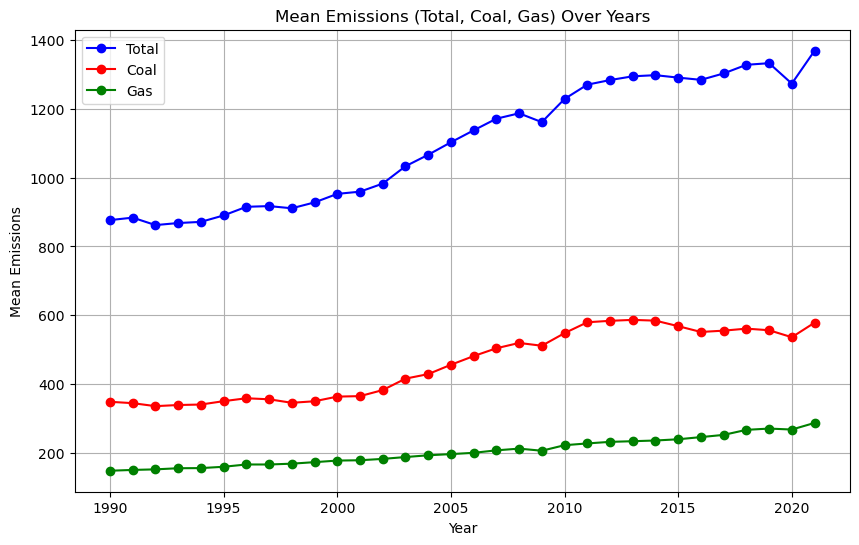

In [68]:
# Filter the data to include only years from 1990 onwards
filtered_data = emission_data[emission_data['Year'] >= 1990]

#Reshape the DataFrame to have 'Year' as a column and 'Total', 'Coal', and 'Gas' emissions as separate columns
emission_long = filtered_data.melt(id_vars=['ISO 3166-1 alpha-3', 'Country', 'Year'], 
                                   value_vars=['Total', 'Coal', 'Gas'], 
                                   var_name='Emission_Type', 
                                   value_name='Emissions')

# Calculate the mean emissions for each emission type ('Total', 'Coal', 'Gas')
mean_emissions = emission_long.groupby(['Emission_Type', 'Year'])['Emissions'].mean().reset_index()

# Plotting the mean emissions as a line graph
plt.figure(figsize=(10, 6))
for emission_type, color in zip(['Total', 'Coal', 'Gas'], ['blue', 'red', 'green']):
    plt.plot(mean_emissions[mean_emissions['Emission_Type'] == emission_type]['Year'], 
             mean_emissions[mean_emissions['Emission_Type'] == emission_type]['Emissions'], 
             marker='o', linestyle='-', color=color, label=emission_type)

plt.xlabel('Year')
plt.ylabel('Mean Emissions')
plt.title('Mean Emissions (Total, Coal, Gas) Over Years')
plt.legend()
plt.grid(True)
plt.show()

## Analysis

### Analytical Exploration between emissions and temperature change



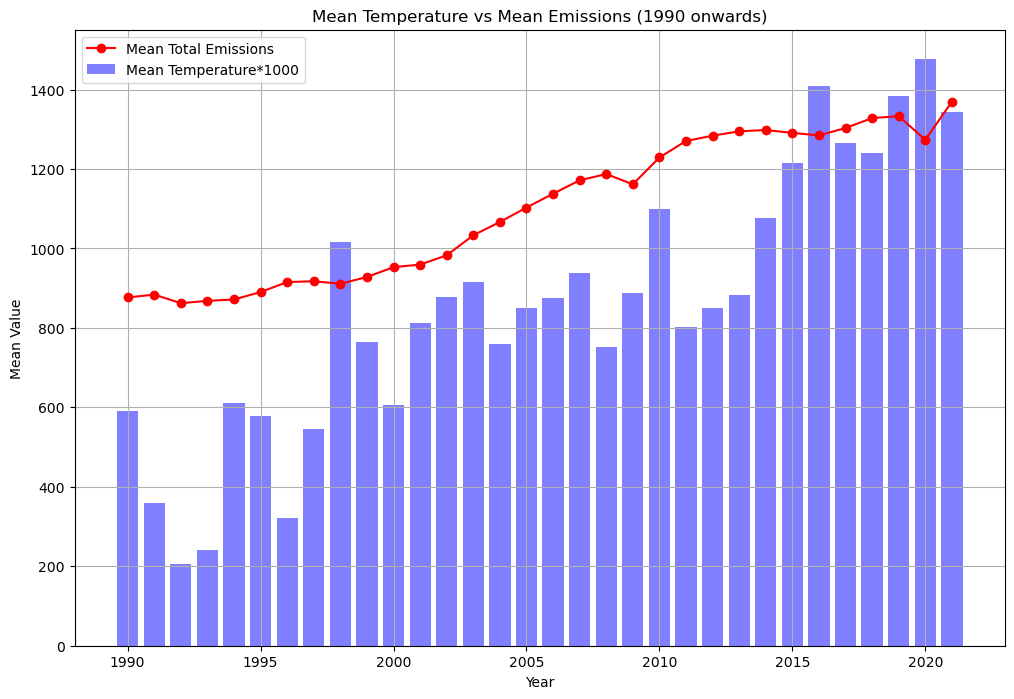

In [78]:
# Reshape the temperature DataFrame to long format and calculate mean temperature for each year from 1990 onwards
temperature_long = temperature_data.melt(id_vars=['ObjectId', 'Country Name', 'Change '], 
                                        var_name='Year', 
                                        value_name='Temperature')
temperature_long['Year'] = pd.to_numeric(temperature_long['Year'])
mean_temperature_by_year = temperature_long[temperature_long['Year'] >= 1990].groupby('Year')['Temperature'].mean().reset_index()

# Multiply mean temperature by 1000
mean_temperature_by_year['Temperature'] *= 1000

# Reshape the emission DataFrame to long format and calculate mean emissions for each type ('Total', 'Coal', 'Gas') from 1990 onwards
filtered_emission_data = emission_data[emission_data['Year'] >= 1990]
emission_long = filtered_emission_data.melt(id_vars=['ISO 3166-1 alpha-3', 'Country', 'Year'], 
                                            value_vars=['Total', 'Coal', 'Gas'], 
                                            var_name='Emission_Type', 
                                            value_name='Emissions')
mean_emissions = emission_long.groupby(['Emission_Type', 'Year'])['Emissions'].mean().reset_index()

# Plotting mean temperature and mean emissions on the same graph
plt.figure(figsize=(12, 8))

# Plot mean temperature as bar plot
plt.bar(mean_temperature_by_year['Year'], mean_temperature_by_year['Temperature'], color='b', alpha=0.5, label='Mean Temperature*1000')

# Plot mean emissions as lines
for emission_type, color in zip(['Total'], ['r']):
    plt.plot(mean_emissions[mean_emissions['Emission_Type'] == emission_type]['Year'], 
             mean_emissions[mean_emissions['Emission_Type'] == emission_type]['Emissions'], 
             marker='o', linestyle='-', color=color, label=f'Mean {emission_type} Emissions')

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Temperature vs Mean Emissions (1990 onwards)')
plt.legend()
plt.grid(True)
plt.show()

## World map depicting the countries from highest to lowest temperature change

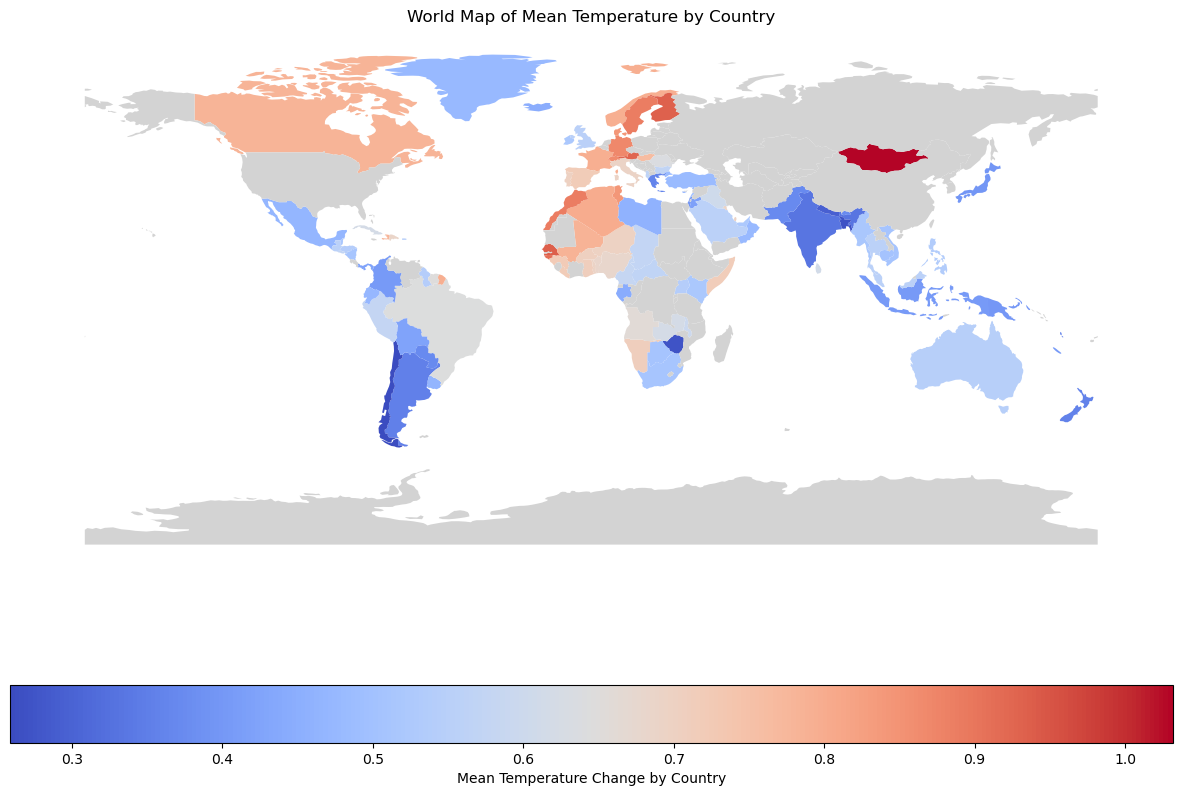

In [113]:
# Reshape the temperature DataFrame to long format
temperature_long = temperature_data.melt(id_vars=['ObjectId', 'Country Name', 'Change '], 
                                         var_name='Year', 
                                         value_name='Temperature')

# Calculate the mean temperature for each country over all the years
mean_temperature_by_country = temperature_long.groupby('Country Name')['Temperature'].mean().reset_index()

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the temperature data
world = world.merge(mean_temperature_by_country, how='left', left_on='name', right_on='Country Name')

# Plot the world map with the mean temperature
fig, ax = plt.subplots( figsize=(15, 10))

world.plot(column='Temperature', ax=ax, legend=True,
           legend_kwds={'label': "Mean Temperature Change by Country",'orientation': "horizontal"},
          
           cmap='coolwarm', missing_kwds={
               "color": "lightgrey",
               
               "hatch": "",
               "label": "Missing values",
           })
ax.set_frame_on(False)
ax.axis('off')
# Add a title
plt.title('World Map of Mean Temperature by Country')
plt.show()

## World map depicting the countries from highest to lowest emissions

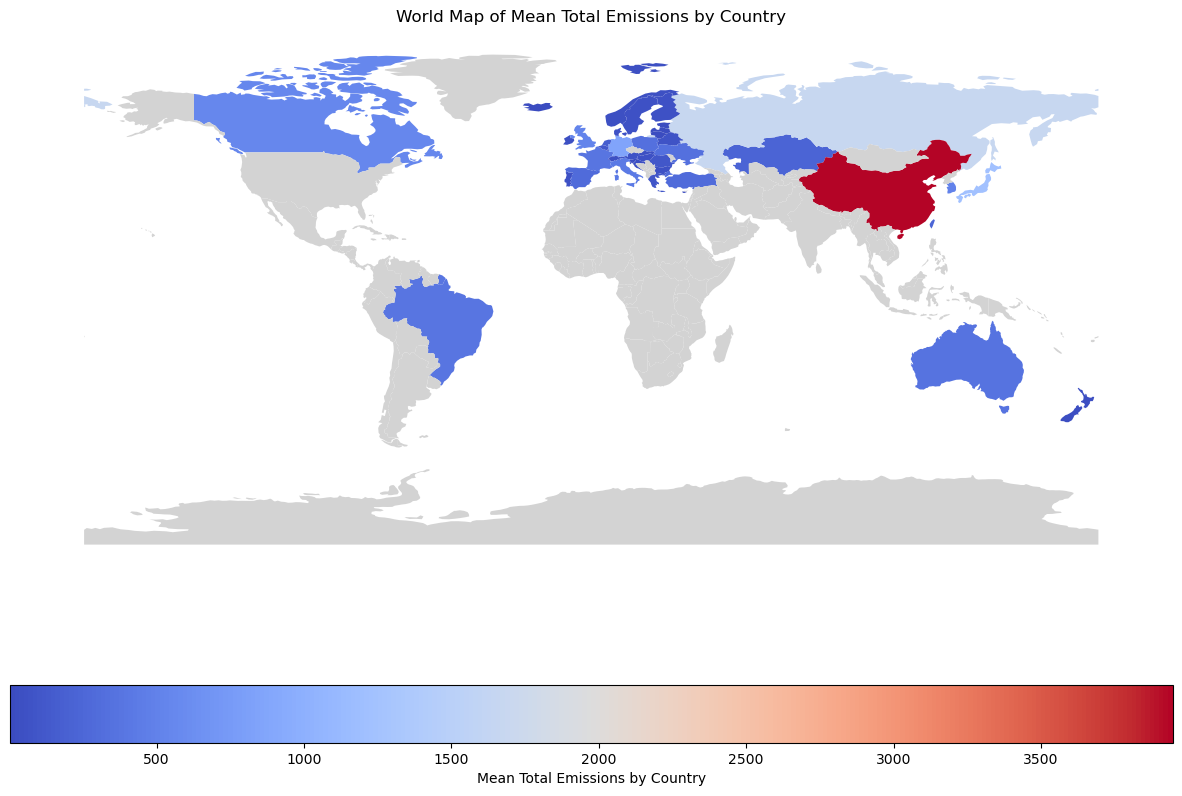

In [112]:
# Assuming emission_data is your initial DataFrame
mean_emissions_by_country = emission_data.groupby('Country')['Total'].mean().reset_index()

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the emission data
world = world.merge(mean_emissions_by_country, how='left', left_on='name', right_on='Country')

# Plot the world map with the mean total emissions
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.plot(column='Total', ax=ax, legend=True,
           legend_kwds={'label': "Mean Total Emissions by Country",'orientation': "horizontal"},
           cmap='coolwarm', edgecolor='none', missing_kwds={
               "color": "lightgrey",
               "hatch": "",
               "label": "Missing values",
           })

# Add a title
plt.title('World Map of Mean Total Emissions by Country')

# Remove the border
ax.set_frame_on(False)
ax.axis('off')

plt.show()